In [157]:
from biolearn.data_library import DataLibrary
from biolearn import other_biomarkers
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
from matplotlib.lines import Line2D


In [168]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

In [27]:
sex_dict={1:'female', 2:'male'}

In [ ]:
# data_source = DataLibrary().get("GSE40279")
# data=data_source.load()
# methylation_data = data.dnam
# sex_df=other_biomarkers.estimate_sex(methylation_data)
# GSE40279 = pd.merge(data.metadata[['sex']], sex_df[['predicted_sex']], left_index=True, right_index=True)
# GSE40279['sex']=GSE40279['sex'].map(sex_dict)

In [34]:
data_source = DataLibrary().get("GSE51057")
data=data_source.load()
methylation_data = data.dnam
sex_df=other_biomarkers.estimate_sex(methylation_data)
GSE51057 = pd.merge(data.metadata[['sex']], sex_df[['predicted_sex']], left_index=True, right_index=True)
GSE51057['sex']=GSE51057['sex'].map(sex_dict)

In [35]:
data_source = DataLibrary().get("GSE42861")
data=data_source.load()
methylation_data = data.dnam
sex_df=other_biomarkers.estimate_sex(methylation_data)
GSE42861 = pd.merge(data.metadata[['sex']], sex_df[['predicted_sex']], left_index=True, right_index=True)
GSE42861['sex']=GSE42861['sex'].map(sex_dict)

In [36]:
data_source = DataLibrary().get("GSE41169")
data=data_source.load()
methylation_data = data.dnam
sex_df=other_biomarkers.estimate_sex(methylation_data)
GSE41169 = pd.merge(data.metadata[['sex']], sex_df[['predicted_sex']], left_index=True, right_index=True)
GSE41169['sex']=GSE41169['sex'].map(sex_dict)

In [51]:
# data_source = DataLibrary().get("GSE73103")
# data=data_source.load()
# methylation_data = data.dnam
# sex_df=other_biomarkers.estimate_sex(methylation_data)
# GSE73103 = pd.merge(data.metadata[['sex']], sex_df[['predicted_sex']], left_index=True, right_index=True)
# # GSE73103['sex']=GSE73103['sex'].map(sex_dict)

In [62]:
# GSE73103

,sex,predicted_sex
id,,
GSM1886364,Male,Female
GSM1886365,Male,Female
GSM1886366,Male,Female
GSM1886367,Female,Female
GSM1886368,Male,Female
...,...,...
GSM1886799,Female,Female
GSM1886800,Male,Female
GSM1886801,Female,Female


In [55]:
data_source = DataLibrary().get("GSE64495")
data=data_source.load()
methylation_data = data.dnam
sex_df=other_biomarkers.estimate_sex(methylation_data)
GSE64495 = pd.merge(data.metadata[['sex']], sex_df[['predicted_sex']], left_index=True, right_index=True)
# GSE64495['sex']=GSE64495['sex'].map(sex_dict)

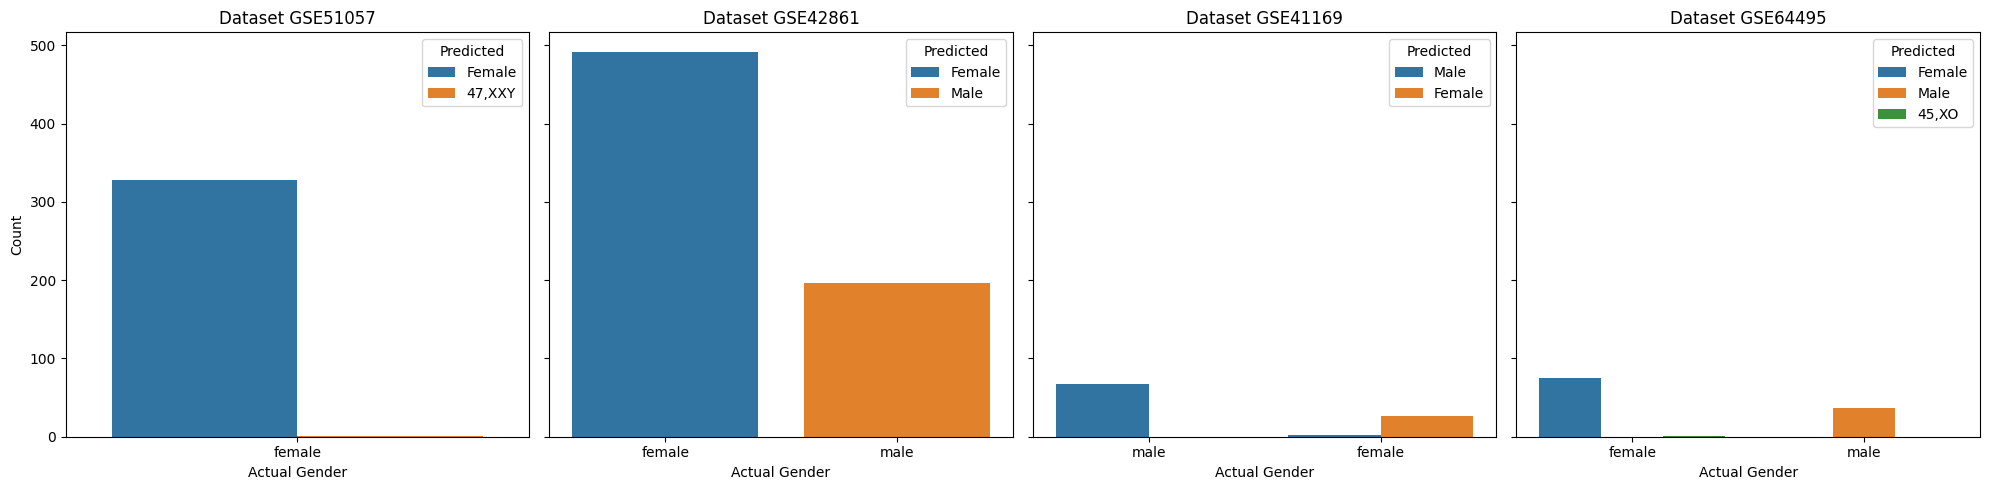

In [63]:
df_list = [GSE51057, GSE42861, GSE41169, GSE64495]
df_names = ['GSE51057', 'GSE42861', 'GSE41169', 'GSE64495']
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

for i, df in enumerate(df_list):
    ax = axes[i]
    cm = confusion_matrix(df['sex'], df['predicted_sex'])
    
    df_results = pd.DataFrame({'Actual': df['sex'], 'Predicted': df['predicted_sex']})
    
    sns.countplot(x='Actual', hue='Predicted', data=df_results, ax=ax)
    
    ax.set_title(f'Dataset {df_names[i]}')
    ax.set_xlabel('Actual Gender')
    ax.set_ylabel('Count')

plt.tight_layout()

plt.show()


In [103]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
df_list = [GSE51057, GSE42861, GSE41169, GSE64495]

for i, df in enumerate(df_list):
    df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
    df['predicted_sex'] = df['predicted_sex'].replace({'male': 'male', 'female': 'female'}, regex=True).fillna('other')
    y_true=df['sex'].values
    y_pred=df['predicted_sex'].values
    accuracy = accuracy_score(y_true, y_pred)
    
    print(f"Accuracy: {accuracy}")


Accuracy: 0.9969604863221885
Accuracy: 1.0
Accuracy: 0.9789473684210527
Accuracy: 0.9911504424778761


/var/folders/01/c9lhjgwd44q7h1qzt9z7_nzw0000gn/T/ipykernel_55508/1784367101.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
/var/folders/01/c9lhjgwd44q7h1qzt9z7_nzw0000gn/T/ipykernel_55508/1784367101.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
/var/folders/01/c9lhjgwd44q7h1qzt9z7_nzw0000gn/T/ipykernel_55508/1784367101.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
/var/folders/01/c9lhjgwd44q7h1qzt9z7_nzw0000gn/T/ipykernel_55508/1784367101.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


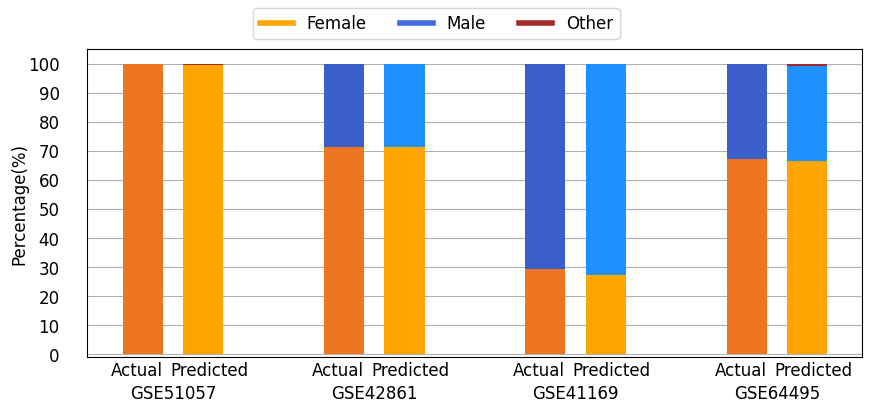

In [232]:
# import warnings

# warnings.simplefilter("ignore")

font = {'family' : 'normal',
    'size'   : 12}

plt.rc('font', **font)
plt.rcParams['font.family'] = 'sans-serif'

females=[]
males=[]
others=[]

predicted_females=[]
predicted_males=[]
predicted_others=[]

df_list = [GSE51057, GSE42861, GSE41169, GSE64495]

for i in range(len(df_list)):
    df=df_list[i]
    df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
    
    female=(df['sex']=='female').sum()
    male=(df['sex']=='male').sum()
    other=df.shape[0]-female-male

    predicted_female=(df['predicted_sex']=='female').sum()
    predicted_male=(df['predicted_sex']=='male').sum()
    predicted_other=df.shape[0]-predicted_female-predicted_male

    females.append(female/df.shape[0]*100)
    males.append(male/df.shape[0]*100)
    others.append(other/df.shape[0]*100)
    
    predicted_females.append(predicted_female/df.shape[0]*100)
    predicted_males.append(predicted_male/df.shape[0]*100)
    predicted_others.append(predicted_other/df.shape[0]*100)    

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4),  sharey='row')#sharex=True,
plt.subplots_adjust(wspace=0.05, hspace=0.05)
labels=df_names
sub_labels=['Actual','Predicted']
w=0.2
c=0.75
p=0.15
x = np.arange(0, len(labels))   
x_=[-(c+p)*w, (c+p)*w, 1-(c+p)*w, 1+(c+p)*w, 2-(c+p)*w, 2+(c+p)*w, 3-(c+p)*w, 3+(c+p)*w ]
labels_=['Actual', 'Predicted','Actual', 'Predicted','Actual', 'Predicted','Actual', 'Predicted']


ax.bar(x[0]-c*w,females[0], color='#EE7621', width=w)
ax.bar(x[0]-c*w,males[0], bottom=females[0], color='#3A5FCD', width=w)
ax.bar(x[0]-c*w,others[0], bottom=females[0]+males[0], color='brown', width=w)

ax.bar(x[1]-c*w,females[1], color='#EE7621', width=w)
ax.bar(x[1]-c*w,males[1], bottom=females[1], color='#3A5FCD', width=w)
ax.bar(x[1]-c*w,others[1], bottom=females[1]+males[1], color='brown', width=w)

ax.bar(x[2]-c*w,females[2], color='#EE7621', width=w)
ax.bar(x[2]-c*w,males[2], bottom=females[2], color='#3A5FCD', width=w)
ax.bar(x[2]-c*w,others[2], bottom=females[2]+males[2], color='brown', width=w)

ax.bar(x[3]-c*w,females[3], color='#EE7621', width=w)
ax.bar(x[3]-c*w,males[3], bottom=females[3], color='#3A5FCD', width=w)
ax.bar(x[3]-c*w,others[3], bottom=females[3]+males[3], color='brown', width=w)


ax.bar(x[0]+c*w,predicted_females[0], color='orange', width=w)
ax.bar(x[0]+c*w,predicted_males[0], bottom=predicted_females[0], color='dodgerblue', width=w)
ax.bar(x[0]+c*w,predicted_others[0], bottom=predicted_females[0]+predicted_males[0], color='brown', width=w)

ax.bar(x[1]+c*w,predicted_females[1], color='orange', width=w)
ax.bar(x[1]+c*w,predicted_males[1], bottom=predicted_females[1], color='dodgerblue', width=w)
ax.bar(x[1]+c*w,predicted_others[1], bottom=predicted_females[1]+predicted_males[1], color='brown', width=w)

ax.bar(x[2]+c*w,predicted_females[2], color='orange', width=w)
ax.bar(x[2]+c*w,predicted_males[2], bottom=predicted_females[2], color='dodgerblue', width=w)
ax.bar(x[2]+c*w,predicted_others[2], bottom=predicted_females[2]+predicted_males[2], color='brown', width=w)

ax.bar(x[3]+c*w,predicted_females[3], color='orange', width=w)
ax.bar(x[3]+c*w,predicted_males[3], bottom=predicted_females[3], color='dodgerblue', width=w)
ax.bar(x[3]+c*w,predicted_others[3], bottom=predicted_females[3]+predicted_males[3], color='brown', width=w)

    
ax.set_xticks(x_, minor=True)
ax.set_xticklabels(labels_, minor=True)

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.tick_params(which='major', pad=20)
ax.tick_params(axis=u'both', which=u'both',length=0)

ax.set_ylim((-1,105))
ax.set_yticks(np.arange(0, 101 ,10))
ax.yaxis.grid(True)
ax.set_axisbelow(True)

ax.set_ylabel('Percentage(%)', labelpad=0)
line = Line2D([0,1],[0,1], linewidth=4)
legend_labels=['Female','Male', 'Other']
legend=fig.legend([line, line, line], legend_labels, loc='upper center',ncol=len(legend_labels), borderaxespad=0.5)
handles = legend.legendHandles
handles[0].set_color('orange')
handles[1].set_color('royalblue')
handles[2].set_color('brown')

plt.savefig('sex_prediction.png', bbox_inches='tight')

plt.show()
